In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
parkinson_df = pd.read_csv('parkinsons.csv')
parkinson_df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
66,phon_R01_S18_1,140.341,159.774,67.021,0.00817,0.00006,0.00430,0.00440,0.01289,0.03198,...,0.05490,0.02183,19.560,1,0.460139,0.720908,-5.409423,0.226850,2.359973,0.226156
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362
80,phon_R01_S20_3,96.106,108.664,84.510,0.00694,0.00007,0.00389,0.00415,0.01168,0.04024,...,0.06799,0.01823,19.055,1,0.544805,0.770466,-4.441519,0.155097,2.645959,0.327978
13,phon_R01_S04_2,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,...,0.02184,0.01041,24.889,1,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
182,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,...,0.03464,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368


In [4]:
parkinson_df.shape

(195, 24)

In [ ]:
#### Frequency parameters
# MDVP:Fo(Hz) - Average vocal fundamental frequency
# MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
# MDVP:Flo(Hz) - Minimum vocal fundamental frequency
# MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP 
# Several measures of variation in fundamental frequency

In [ ]:
#### Amplitude parameters
# MDVP:Shimmer,
# MDVP:Shimmer(dB),
# Shimmer:APQ3,
# Shimmer:APQ5,
# MDVP:APQ,
# Shimmer:DDA - Several measures of variation in amplitude

In [5]:
parkinson_df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<AxesSubplot:>

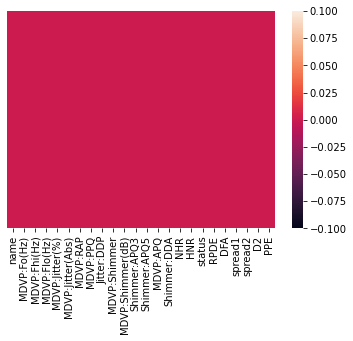

In [7]:
sns.heatmap(parkinson_df.isnull(), yticklabels=False)

In [ ]:
sns.pairplot(parkison_df)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
X = parkinson_df.drop(labels=['name','status'], axis=1)
y = parkinson_df['status']

In [13]:
logmodel = LogisticRegression(solver='saga')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='saga')

In [17]:
predictions = logmodel.predict(X_test)

In [18]:
classification_report(y_test, predictions)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        15\n           1       0.75      1.00      0.85        44\n\n    accuracy                           0.75        59\n   macro avg       0.37      0.50      0.43        59\nweighted avg       0.56      0.75      0.64        59\n'

In [19]:
confusion_matrix(y_test, predictions)

array([[ 0, 15],
       [ 0, 44]])

In [20]:
accuracy_score(y_test, predictions)

0.7457627118644068